# **Unit 4 Project - IRONMAN**

### Problem Statement: Which Ironman race in North America provides the best chance to earn a slot to the Iroman World Championships in Kona, HI?

### Assumptions

* An Ironman is a 140.6 mile triathlon race which is composed of a 2.4 mile Swim, a 112 mile Bike, and a 26.2 mile Run
* "Best Chance" has several meanings including:
    * Slowest Swim, Bike, Run Splits
    * Number of Competitors
    * Course factors (elevation, weather, wet suit legal, etc.)
* Evaluate only Male 30-34 and 35-39 age groups; these are typically the largest and most competitive age groups and the age classification I would compete in the near future.
* Assume 3 Kona Slots will be available per age group per race
* Dataset created from webscrape of all available North American race locations from 2013-2018
* Dataset includes competitors who Did Not Start (DNS), DNF (Did Not Finish), Disqualified (DQ)
* Most Ironman events have a 17 hour cutoff time to complete the race.
* Portions of the race can be cancelled due to unsafe conditions, e.g. IM Maryland Swim 2016
* Wetsuit legal races are those in which the water temperature is below 78°F
* Transition Times for Swim to Bike(T1) and Bike to Run (T2) will not be included in analysis

In [50]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import scipy.stats as stats

In [51]:
data = pd.read_csv('race_results.csv') #read in the data
az = pd.read_csv('arizona.csv') #read in the data

In [58]:
data['race_loc'] = data.Race.map({'Wisconsin':1, 'Texas':2, 'Florida':3, 'Lake Placid': 4, 'Arizona':5,\
                        'Cozumel':6, 'Mont-Tremblant':7, 'Louisville': 8, 'Boulder':9, 'Chattanooga': 10,\
                         'Canada':11, 'Maryland':12, 'Santa Rosa':13})

In [52]:
#Fields in the dataset contain ---,DQ(disqualified),DNS (did not start), DNF (did not finish) 
#Sometime portions of races are cancelled due to unsafe conditions e.g. Ironman Maryland 2016 & Florida 2014 Swim

data = data.replace([['---','DNF','DQ','DNS']],np.nan) #replace values with NaN

#Change the Swim, Bike, Run, and Finish time splits from objects to Datetime in total seconds
data['Swim'] = pd.to_timedelta(data['Swim']).dt.total_seconds()
data['Bike'] = pd.to_timedelta(data['Bike']).dt.total_seconds()
data['Run'] = pd.to_timedelta(data['Run']).dt.total_seconds()
data['Finish'] = pd.to_timedelta(data['Finish']).dt.total_seconds()

In [59]:
#Fields in the dataset contain ---,DQ(disqualified),DNS (did not start), DNF (did not finish) 
#Sometime portions of races are cancelled due to unsafe conditions e.g. Ironman Maryland 2016 & Florida 2014 Swim

az = az.replace([['---','DNF','DQ','DNS']],np.nan) #replace values with NaN

#Change the Swim, Bike, Run, and Finish time splits from objects to Datetime in total seconds
az['Swim'] = pd.to_timedelta(az['Swim']).dt.total_seconds()
az['Bike'] = pd.to_timedelta(az['Bike']).dt.total_seconds()
az['Run'] = pd.to_timedelta(az['Run']).dt.total_seconds()
az['Finish'] = pd.to_timedelta(az['Finish']).dt.total_seconds()

In [60]:
data.Age_Group.replace('30-34', '1', inplace=True)
data.Age_Group.replace('35-39', '2', inplace=True)
data['Age_Group'] = data.Age_Group.astype('int')
data['Div_Rank'] = data.Age_Group.astype('int')

In [61]:
data.Finish.head()

22    28397.0
40    29578.0
43    29710.0
44    29719.0
48    29844.0
Name: Finish, dtype: float64

In [62]:
data = data.dropna()

feature_cols = ['Swim','Bike','Run','race_loc']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.9971511731926245

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(model_data, feature_cols):
    X = data[feature_cols]
    y = data['Finish']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [64]:
print(train_test_rmse(data, ['Swim', 'Bike', 'Run']))

357.72845023244776


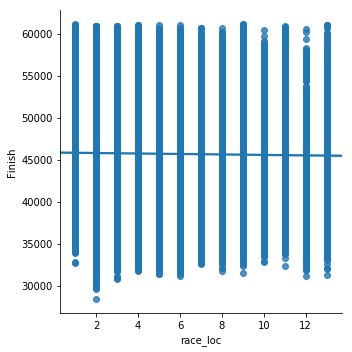

In [65]:
sns.lmplot(x='race_loc', y='Finish', data = data)

In [66]:
data.Age_Group.replace('30-34', '1', inplace=True)
data.Age_Group.replace('35-39', '2', inplace=True)
data['Age_Group'] = data.Age_Group.astype('int')

In [67]:
data.groupby('Race').Swim.describe()

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
Arizona,2121.0,4859.474305,869.861559,3030.0,4247.00,4750.0,5359.00,8380.0
Boulder,1429.0,4854.444367,783.124469,2963.0,4302.00,4727.0,5269.00,8151.0
Canada,1466.0,4550.371760,742.102581,2868.0,4026.25,4470.5,4994.75,7930.0
Chattanooga,1441.0,3711.868147,541.443585,2391.0,3341.00,3648.0,4010.00,6967.0
Cozumel,1877.0,3982.658498,956.394724,2068.0,3286.00,3880.0,4542.00,8399.0
Florida,1830.0,4865.983607,792.071761,2977.0,4324.25,4813.0,5323.00,8434.0
Lake Placid,2241.0,4113.029451,1161.807867,1495.0,3628.00,4326.0,4850.00,8044.0
Louisville,1930.0,4341.793782,655.862417,2807.0,3906.75,4289.0,4721.50,7147.0
Maryland,704.0,4438.434659,1053.711601,2433.0,3587.75,4396.5,5087.25,8131.0


In [68]:
data.head()

,Name,Country,Div_Rank,Gender Rank,Overall Rank,Swim,Bike,Run,Finish,Points,...,Water_Temp,Start_Elevation_Bike,Finish_Elevation_Bike,Elevation_Gain_Bike,Start_Elevation_Run,Finish_Elevation_Run,Elevation_Gain_Run,Avg_Weather_Temp_High,Avg_Weather_Temp_Low,race_loc
22,"Giuliano, Ryan",USA,1,18,18,3831.0,13733.0,10528.0,28397.0,5000,...,75,111,111,1224,149,144,493,85,65,2
40,"VALENCIA, JUAN",COL,2,29,30,3221.0,14507.0,11479.0,29578.0,5000,...,75,111,111,1224,149,144,493,85,65,2
43,"Cook, Colin",USA,1,30,31,3919.0,14082.0,11333.0,29710.0,4737,...,75,111,111,1224,149,144,493,85,65,2
44,"O'Donnell, Jesse",USA,1,31,32,3734.0,13850.0,11786.0,29719.0,4735,...,75,111,111,1224,149,144,493,85,65,2
48,"Giuliano, Ryan",USA,1,19,19,3701.0,15659.0,10149.0,29844.0,5000,...,75,111,111,1224,149,144,493,78,57,2


In [69]:
data = data.dropna()

feature_cols = ['Water_Temp','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Swim']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.04003098325521004

In [70]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Bike','Start_Elevation_Bike', 'Finish_Elevation_Bike','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Bike']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.03228998301919561

In [71]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Run','Start_Elevation_Run', 'Finish_Elevation_Run','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Bike']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.046003202542050925

In [72]:
data.groupby('Race').Finish.describe()

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
Arizona,2121.0,45549.464404,6652.290791,31432.0,40526.00,45108.0,50167.00,61057.0
Boulder,1429.0,47054.276417,6499.976182,31520.0,42415.00,46757.0,51772.00,61180.0
Canada,1466.0,45684.000000,6340.101253,32326.0,40813.25,45326.5,50126.25,60853.0
Chattanooga,1441.0,45723.607911,6070.491313,32829.0,41024.00,45427.0,50066.00,60421.0
Cozumel,1877.0,45460.273308,6382.508650,31174.0,40837.00,45112.0,49798.00,61011.0
Florida,1830.0,45222.354098,6619.383769,30753.0,40361.00,44519.0,49716.25,60897.0
Lake Placid,2241.0,45884.392236,6075.009100,31753.0,41561.00,45527.0,49912.00,60989.0
Louisville,1930.0,45987.663731,6152.346480,31733.0,41480.00,45722.0,50526.00,60625.0
Maryland,704.0,44306.903409,6240.392452,31101.0,39594.25,44303.5,48664.50,60574.0


In [73]:
data = data.dropna()

feature_cols = ['Swim']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.2998878645775125

In [74]:
data = data.dropna()

feature_cols = ['Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.7718537471918719

In [75]:
data = data.dropna()

feature_cols = ['Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.8151574117228875

In [76]:
data = data.dropna()

feature_cols = ['race_loc']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.00021961603445441735

In [77]:
data = data.dropna()

feature_cols = ['Age_Group']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

9.326986119018164e-05

In [78]:
data = data.dropna()

feature_cols = ['Water_Temp']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0009309771868315497

In [79]:
data = data.dropna()

feature_cols = ['Start_Elevation_Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.004187692675087562

In [80]:
data = data.dropna()

feature_cols = ['Finish_Elevation_Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.004137554573751423

In [81]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Bike']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0009063304544990602

In [82]:
data = data.dropna()

feature_cols = ['Start_Elevation_Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0043981373671562185

In [83]:
data = data.dropna()

feature_cols = ['Finish_Elevation_Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.004354806412459111

In [84]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

4.656885842768688e-05

In [85]:
data = data.dropna()

feature_cols = ['Avg_Weather_Temp_High']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.0006937492269173395

In [86]:
data = data.dropna()

feature_cols = ['Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

1.336674936991411e-05

In [87]:
data = data.dropna()

feature_cols = ['Water_Temp']
X= data[feature_cols]
y = data['Swim']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.023194952114104272

In [88]:
data = data.dropna()

feature_cols = ['Elevation_Gain_Bike','Start_Elevation_Bike','Finish_Elevation_Bike']
X= data[feature_cols]
y = data['Bike']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

0.02224203039318695

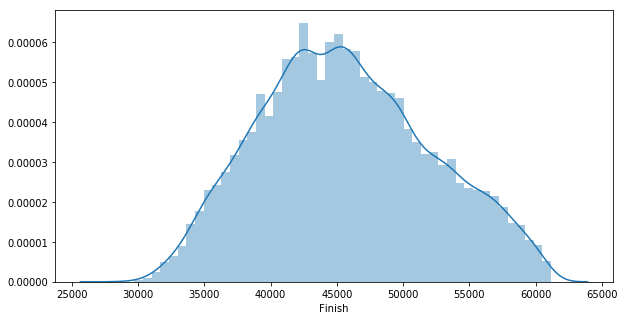

In [89]:
# distribution of target (race finish times in milliseconds)# distrib 
plt.figure(figsize=(10,5))
sns.distplot(data.Finish);

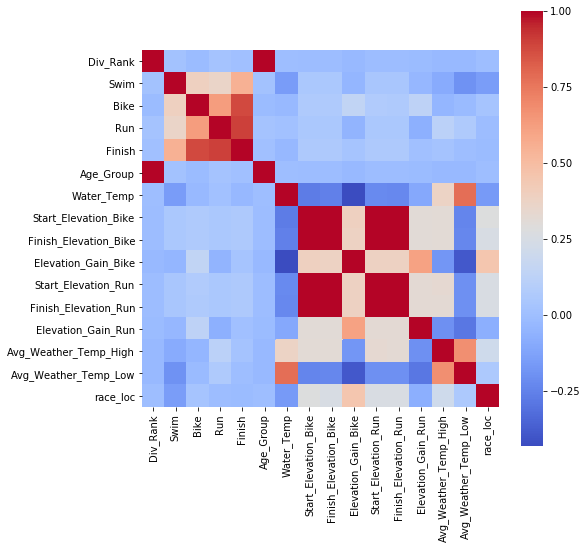

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), square=True, cmap='coolwarm');

In [ ]:
sns.pairplot(data=data,
                  y_vars=['Finish'],
                  x_vars=data.columns);

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['Swim','Bike','Run','race_loc','Water_Temp','Elevation_Gain_Bike',
                'Start_Elevation_Bike','Finish_Elevation_Bike','Elevation_Gain_Run',
                'Start_Elevation_Run','Finish_Elevation_Run','Avg_Weather_Temp_High',
                'Avg_Weather_Temp_Low']

X = data[feature_cols]
y = data['Finish']
    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)


In [ ]:
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
results.summary()

In [ ]:
y_pred = results.predict(sm.add_constant(X))

plt.figure(figsize=(10,5))
plt.xlim(xmin=25000, xmax=68000)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.scatter(y_pred,y-y_pred,alpha=.1);
plt.plot(np.linspace(0,310000,1000),np.linspace(0,0,1000), color='c');

In [ ]:
feature_cols = ['Swim','Bike','Run','race_loc','Water_Temp','Elevation_Gain_Bike',
                'Start_Elevation_Bike','Finish_Elevation_Bike','Elevation_Gain_Run',
                'Start_Elevation_Run','Finish_Elevation_Run','Avg_Weather_Temp_High',
                'Avg_Weather_Temp_Low']

X = data[feature_cols]
y = data['Finish']
    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)

model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
results.rsquared

In [ ]:
y_pred = results.predict(sm.add_constant(X))
res = y - y_pred

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.title('Residuals vs Predicted Value')
plt.xlim(xmin=25000, xmax=68000)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.scatter(y_pred, res, alpha=.1);
plt.plot(np.linspace(0,3100000,1000),np.linspace(0,0,1000), color='c');

plt.subplot(1, 3, 2)
plt.title('Distribution of Residuals')
plt.xlabel('Error Value')
sns.distplot(res);

plt.subplot(1, 3, 3)
stats.probplot(res, plot=plt);
plt.title('Q-Q Plot of Residuals');

print('>> Mean of residuals: ',(res).mean())

In [ ]:
az = az.dropna()

feature_cols = ['Swim','Bike','Run']
X= az[feature_cols]
y = az['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

In [ ]:
az = az.dropna()

feature_cols = ['Elevation_Gain_Bike','Start_Elevation_Bike', 'Finish_Elevation_Bike','Avg_Weather_Temp_High','Avg_Weather_Temp_Low']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

In [ ]:
az = az.dropna()

feature_cols = ['Water_Temp']
X= data[feature_cols]
y = data['Swim']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)

In [ ]:
kona = data[(data.Div_Rank < 4)]

In [ ]:
kona = kona.dropna()

feature_cols = ['Swim', 'Bike', 'Run']
X= data[feature_cols]
y = data['Finish']

lr = LinearRegression()

lr.fit(X, y)

lr.score(X, y)